# sloth dataset DSML final project - Itamar Raanan

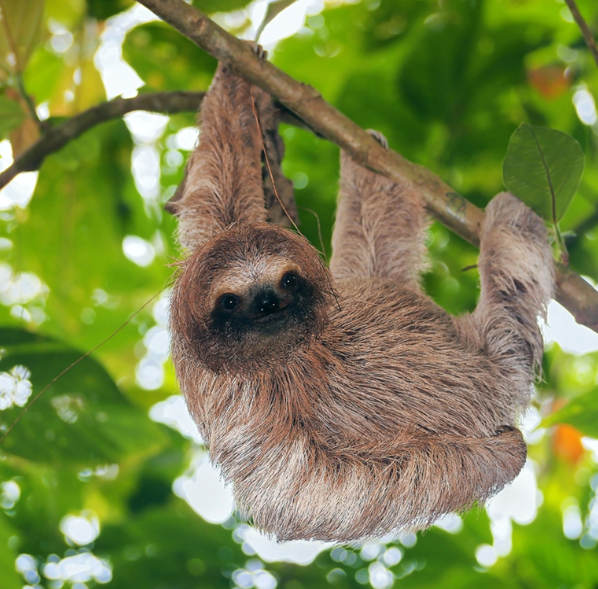

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron


# data descrbie

<div dir=rtl>
בפרויקט הסיום שלי במדעי הנתונים ולמידת מכונה, בחרתי להתעמק ולחקור על סיווג בין סוגי עצלנים 
בעולם. 
הציפייה שלי מהמכונה הלומדת שאבנה היא להצליח להבדיל בין שישה מיני עצלנים שונים. 
את הדטאסט לקחתי מתוך האתר קאגל, ושמו הוא "סוגי עצלנים" (Species of sloths
).
הדטאסט שלי מכיל 5000 שורות, שמתוכן בממוצע 800 שורות על כל סוג. 
התכונות אשר בעזרתן המכונה תבדיל בין סוגי העצלנים הם: אורך כפה, רמת סכנת הכחדה, גודל, סוג 
משפחה,משקל ואורך זנב.
תכנית העבודה שלי היא תחילה לתאר ולפרט על הדטאסט, לאחר מכן לנקות אותו, אחר כך לעשות פי'צר אנג'ניירינג בנוסף לחלק הגרפים, ולבסוף לעשות את הלמידת מכונה עליו.

הדטאסט שלי הוא דטאסט שמכיל שישה סוגי עצלנים מרחבי העולם, ושמונה תכונות המתארות אותן. הדטסאט הזה מאד נוח לשימוש וכן גם מעניין ומיוחד.


#### **תכונות הדטאסט**
* **specie** - סוג העצלן - מכיל שני סוגים : דו אצבע (tow_toed) , ותלת אצבע (three_toed).

* **sub_specie** - מין העצלן - מכיל שישה סוגים: עצלן גמדי(Pygmy three-toed sloth) , עצלן רעמתי(Maned three-toed sloth) 
, עצלן חיוור גרון(Pale-throated sloth),  עצלן חום גרון (Brown-throated sloth), עצלן לינאוס(Linnaeus's two-toed sloth)ועצלן הופמן (Hoffman's two-toed sloth)

*   **weight_kg**  - משקל העצלן בק"ג

* **size_cm** - גובה העצלן בס"מ

* **claw_length_cm** - אורך טפרי העצלן בס"מ

*   **tail_length_cm** - אורך זנב העצלן בס"מ

* **endangered** - רמת סכנת הכחדה של אותו מין - רמות: דאגה אחרונה(least_concern), פגיע(vulnerable) וסכנת הכחדה חמורה (critically_endangered).

* **Unnamed:** **0**	- מספר העצלן בטבלה


<div dir=rtl> 



כפי שניתן לראות בטבלה שלהלן, הדטאסט מכיל 8 עמודות המתארות תכונות שונות, אך כדי  כדי לא לבלבל את המכונה ושבשלב הסופי המכונה תשיג את מטרתה, אצטרך לעשות כמה שינויים בדטאסט. אך לפני כן, אצטרך להציג את הדטאסט.

 תכילה זימנתי את הדטאסט שלי לקובץ, ושמרתי אותו בתור משתנה בשם df (תא מספר  3 ). כדי לבדוק שהזימון עובד, הרצתי פעולה שמדפיסה את חמשת השורות הראשונות בדטאסט. לאחר מכן, הרצתי פעולה המציגה בטבלה כל משתנה מספרי. בטבלה מוצגת כמותו בדטאסט, הממוצע שלו, סטיית התקן שלו, המספר הראשון שבו,המספר שברבעו הראשון, במחציתו, ברבעו השלישי והאחרון שבו.לאחר מכן הרצתי פעולה שמדפיסה את כל המשתנים שדטאסט, כדי לוודא שהכל תקין.

לאחר שסיימתי לתאר את הדטאסט, התחלתי לבצע בו שינויים.

 בשלב הראשון של ניקוי הנתונים התחלתי בלהוריד את העמודה 
"Unnamed: 0 " (תא מספר 9 )
, המסמלת את מספר השורה/ מספר העצלן בטבלה. בחרתי להוריד את עמודה הזאת, מפני שבדטאסט השורות כבר ממוספרות, ונתון זה רק עלול לבלבל את המכונה.

ההורדה הבאה שעשיתי, היא להוריד את כל השורות שיש בהן עצלן ממין 
" Pygmy three-toed sloth"  (עצלן גמדי).
עצלן זה מאד מיוחד ותכונותיו בולטות משאר העצלנים האחרים ברשימה בשל גודלו הקטן ויהיה יותר קל למכונה לסווגו, אך הסיבה שלשמה בחרתי להוריד אותו מהדטאסט שלי היא בגלל מספרו המועט בדטאסט. לאחר שבדקתי את כמות כל אחד מסוגי העצלנים בדטאסט (תא מספר 7)   גילית שהוא נמצא בדטאסט רק 73 פעמים לעומת כל העצלנים, שרובם נמצאים יותר מ1000 פעמים ברשימה. את ההבדלים בכמויות מיני העצלנים ניתן לראות בתא מספר 8. כמותו המעוטה של העצלן הזה עלולה לבלבל את המכונה מפני שאין מספיק חומר עליו ולכן למכונה יותר קשה ללמוד עליו וישנה סבירות גבוהה יותר שהיא תתבלבל בינו לבין עצלנים אחרים. לכן בתא מספר 10, הורדתי את כל השורות בדטאסט שבהן נמצא העצלן גמדי, בעזרת קןד שמצאתי באינטרנט. 

כדי לבדוק שהסרת העמודה חסרת השם והסרת השורות שהעצלן הגמדי נמצא בהן, בדקתי לראשונה בתא 4 כמה עמודות הדטאסט מכיל וכמה שורות יש בו.
לאחר ההורדה, הרצתי את אותה הפעולה בתא מספר 11, שם גיליתי שמספר העמודות ירד ב1 ומספר השורות ירד ב73, בהתאם למה שצופה.
לאחר שעברתי על הדטאסט שמתי לב שעבור אורך הזנב ישנם נתונים שגויים המסמלים את אורך הזנב כמספר שלילי. בגלל שאורך זנב לא יכול להיות שלילי, נאלציתי להוריד בתא מספר 12 את כל השורות בהן אורך הזנב שלילי. כדי לבדוק שההורדה עבדה, בדקתי בתא שאחריו את מספר השורות והשוותי למספר השורות הקודם, וראיתי שחל שינוי משמעותי במספר השורות. 
כדי להסיר שורות ריקות או שורות כפולות, השתמשתי בפעולה בתא מספר 14 שמוחקת שורות עם ערך not available או שורות מוכפלות.לאחר שהרצתי את הפעולה הזאת, כדי לגלות כמה שורות היא מחקה ואם היא מחקה בכלל, הרצתי בתא מספר 15  את הפעולה df.shape, ולמרבה ההפתעה גיליתי  שלא נוצרו שורות מוכפלות או שורות חסרות ערך.

השלב הבא שאעבוד עליו בעבודה הוא שלב הפיצ'ר אנג'ניירינג.
הפעולה הבאה שאצטרך לעשות בשלב זה, היא להוסיף לכל הנתונים המילויליים, כמו מין העצלן, סוגו ורמת סכנת ההכחדה שלו נתונים מספריים. שלב זה נחוץ בעבודה מפני שהמכונה תוכל לעבוד בשלב נרמול הנתונים והמכונות הלומדות . עבור מין העצלן, בתא 16 הכנתי עמודה חדשה, בשם sub_specie_num (מין העצלן במספר) שם נתנתי לכל אחד מחמש סוגי העצלנים מספר מ1 - 5.
כדי ליצור עוד עמודה ההמספרת את סוג העצלן(specie), השתמשתי באותה פעולה מהתיבה הקודמת, ובה נתנתי לכל סוג מספר מ1-2. כדי ליצור עוד עמודה הממספרת את רמת סכנת ההכחדה, השתמשתי באותה הפעולה מתיבות קודמות, אך משום שנאלצתי להסיר מהדטאסט את המין היחיד שבסכנת הכחדה חמורה, מספרתי רק המינים האחרים המחולקים לשתי רמות הכחדה.לאחר שסיימתי לנמק על הגרפים הורדתי את כל הנתוניים המילולים הכוללים את מין העצלן, סוגו, ורמת סכנת ההכחדה, כדי שבשלב נרמול הנתונים המכונה תוכל לקרוא את הדטאסט.על הסיבה מדוע הורדתי את רמות סכנת ההכחדה המספריות ומין המספרי העצלן אפרט בהמשך






In [117]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sloth_data.csv')
df.head()

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163


In [118]:
df.shape

(5000, 8)

In [119]:
df.describe()

,Unnamed: 0,claw_length_cm,size_cm,tail_length_cm,weight_kg
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,7.423503,60.399852,3.410544,5.253253
std,1443.520003,1.520533,5.929968,2.333288,1.268203
min,0.000000,1.748000,46.928000,-2.942000,0.946000
25%,1249.750000,6.383750,59.904750,1.440250,4.382500
50%,2499.500000,7.445000,62.478500,3.812000,5.274000
75%,3749.250000,8.491500,64.398250,5.351250,6.125250
max,4999.000000,12.171000,68.760000,8.538000,9.997000


In [120]:
df.columns

Index(['Unnamed: 0', 'claw_length_cm', 'endangered', 'size_cm', 'specie',
       'sub_specie', 'tail_length_cm', 'weight_kg'],
      dtype='object')

In [121]:
df['sub_specie'].value_counts()

Hoffman’s two-toed sloth     1198
Linnaeus’s two-toed sloth    1140
Pale-throated sloth          1050
Brown-throated sloth         1002
Maned three-toed sloth        537
Pygmy three-toed sloth         73
Name: sub_specie, dtype: int64

<div dir=rtl>

 השוואת כמות העצלן הגמדי(Pygmy three-toed sloth) לעומת כמות העצלנים האחרים ברשימה.
</div>





<Axes: xlabel='sub_specie', ylabel='count'>

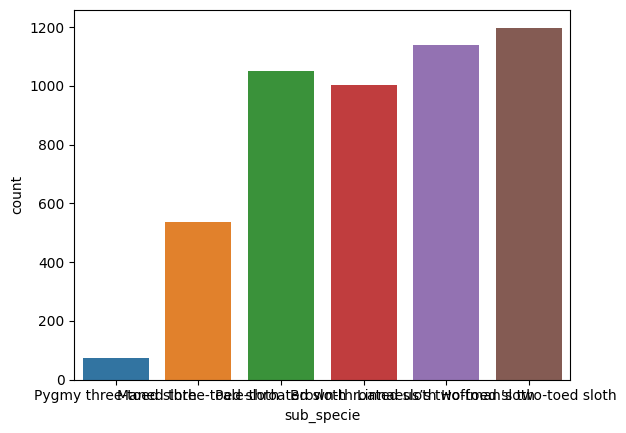

In [122]:
sns.countplot(data=df, x="sub_specie")


# data cleaning

In [123]:
df = df.drop(columns = [ "Unnamed: 0"])


In [124]:
df = df[~df['sub_specie'].isin(['Pygmy three-toed sloth'])]


In [125]:
df.shape

(4927, 7)

In [126]:
df = df.drop(df[df['tail_length_cm'] <= 0].index)


In [127]:
df.shape

(4492, 7)

In [128]:
df.drop_duplicates(inplace=True)
df.dropna( inplace=True)


In [129]:
df.shape

(4492, 7)

# Feature engineering

In [130]:
##יצירת עמודת סיווג מספרי: 
df['sub_specie_num']=df['sub_specie']
df['sub_specie_num']=df['sub_specie_num'].replace({'Maned three-toed sloth': 1, 'Pale-throated sloth' : 2, 'Brown-throated sloth' : 3, "Linnaeus’s two-toed sloth" : 4,'Hoffman’s two-toed sloth': 5})
##Maned three-toed sloth =1 
##Pale-throated sloth = 2
##Brown-throated sloth = 3
##Linnaeus’s two-toed sloth =4
##Hoffman’s two-toed sloth =5

In [131]:
df['sub_specie_num'].value_counts()

5    1189
2    1050
3    1002
4     714
1     537
Name: sub_specie_num, dtype: int64

In [132]:
##יצירת עמודת סיווג מספרי
df['specie_num']=df['specie']
df['specie_num']=df['specie_num'].replace({'three_toed' : 1 , 'two_toed' : 2})
##three_toed = 1
## two_toed =2

In [133]:
##יצירת עמודת סיווג מספרי: 
df['endangered_num']=df['endangered']
df['endangered_num']=df['endangered_num'].replace({'least_concern': 1, 'vulnerable' : 2, 'critically_endangered' : 3})
##least_concern =1 
##vulnerable = 2
##critically_endangered = 3


In [134]:
df.shape

(4492, 10)

<div dir=rtl> 
גרף זה, מתאר את סוג מין העצלן במספר, ואת ממוצע גאורך הזנב שלו. מגרף זה אנחנו יכולים לראות כי הגרפים של עצלן לינאוס ועצלן הופמן, משמעותית יותר רחוקים מהגרפים של שלושת העצלנים האחרים. מידע זה עשוי לשמש לעזור למכונה בשלבים מאוחרים יותר, מפני שני העצלנים האלו הם עצלנים מסוג דו אצבע, לכן יהי יותר קל למכונה לסווג בין סוגי העצלנים בהמשך.

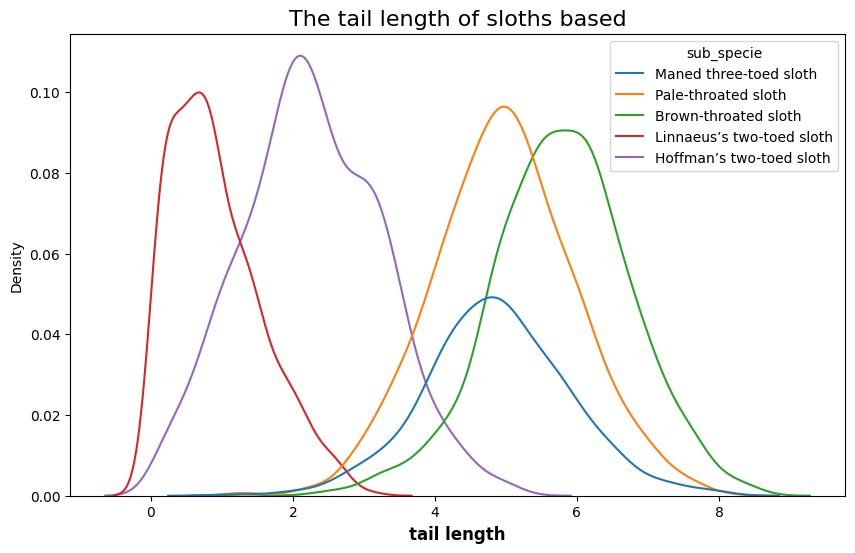

In [135]:
plt.figure(figsize = (10,6))
sns.kdeplot(x = "tail_length_cm", data = df,hue = "sub_specie")
plt.xlabel("tail length", fontsize = 12, fontweight='bold')
plt.title("The tail length of sloths based",fontsize = 16);



---



<div dir=rtl> 

גרף זה מתאר את השפעת גובה העצלן על אורך זנבו. מגרף זה ניתן להסיק שלמעט העצלן 
חיוור צוואר (pale-throated sloth) ככל שגובה העצלן גדל, כך אורך הזנב שלו קטן. גרף זה עשוי להיות חיוני להמשך הפרויקט, מפני שלא רק שהוא מבדיל את העצלן חיוור הגרון משאר העצלנים האחרים, אלה כאשר אקבל נתונים של אורך זנב וגובה יהיה לי יותר קל לסווג את את הנתונים למין העצלן המתאים.בנוסף מגרף זה הסקתי את החריגה השלילת  והלא הגיונית של אורך הזנב קו האפס, וכעת ניתן לראות כי אין נקודה החורגת מקו האפס, כלומר הורדת השורות השליליות עבדה.

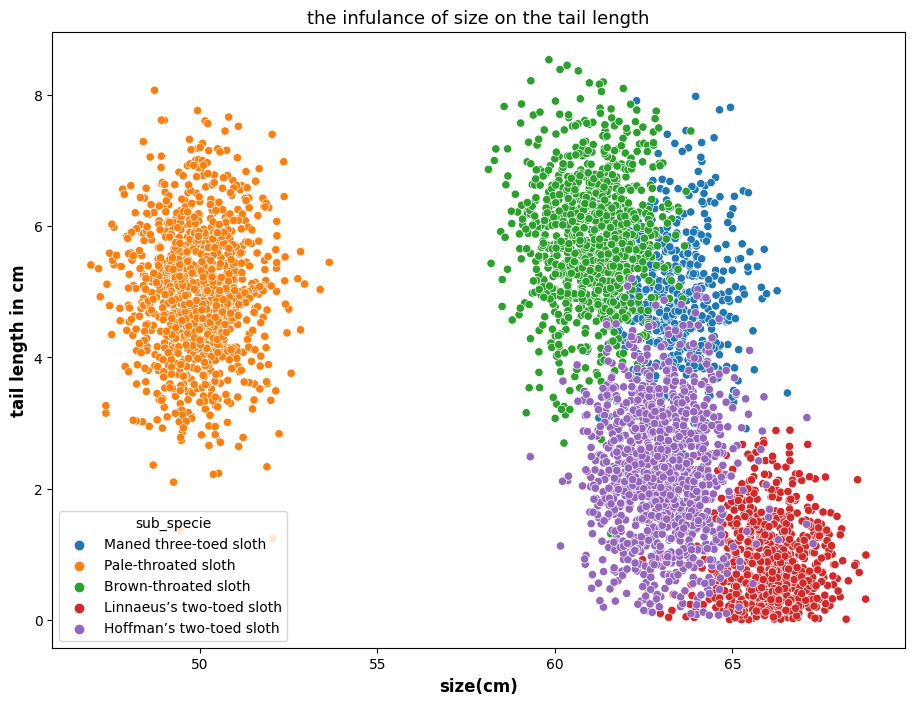

In [136]:
plt.figure(figsize = (11,8))
sns.scatterplot(x = "size_cm", y = "tail_length_cm", data = df, hue = "sub_specie" )
plt.xlabel("size(cm)",fontsize=12,fontweight='bold')
plt.ylabel("tail length in cm",fontsize=12,fontweight='bold')
plt.title("the infulance of size on the tail length",fontsize=13);



---



<div dir=rtl> 

בגרף זה ניתן לראות את השפעת הגובה על המשקל. ניתן להסיק ששוב, למעט עצלן חיוור 
צוואר, ככל שגובהה העצלן יותר גדול כך גם משקלו עולה. נתון זה יכול לעזור לנו בשלב מאוחר יותר ובעזרתו למכונה יהיה יותר קל לסווג כל מין עצלן לפי משקלו וגובהו. 

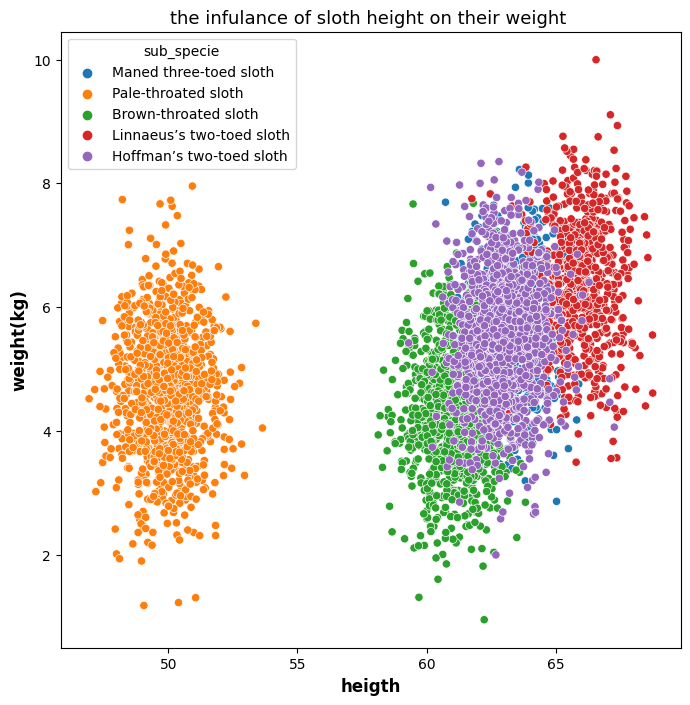

In [142]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = "size_cm", y = "weight_kg", data = df, hue = "sub_specie" )
plt.xlabel("heigth",fontsize=12,fontweight='bold')
plt.ylabel("weight(kg)",fontsize=12,fontweight='bold')
plt.title("the infulance of sloth height on their weight ",fontsize=13);



---



<div dir=rtl> 
בגרף זה ניתן לראות את ממוצע אורך הטפרים של כל סוג עצלן. ת כאשר החלק הדק בצורה מצביע על החריגים הממוצע, והחלק העבה מצביע על הממוצע. בגרף ניתן לשים לב כי המין עצלן הופמן חורג מהנורמה, ולכן מידע זה נחוץ למכונה לשלבים המאוחרים יותר בעבודה .

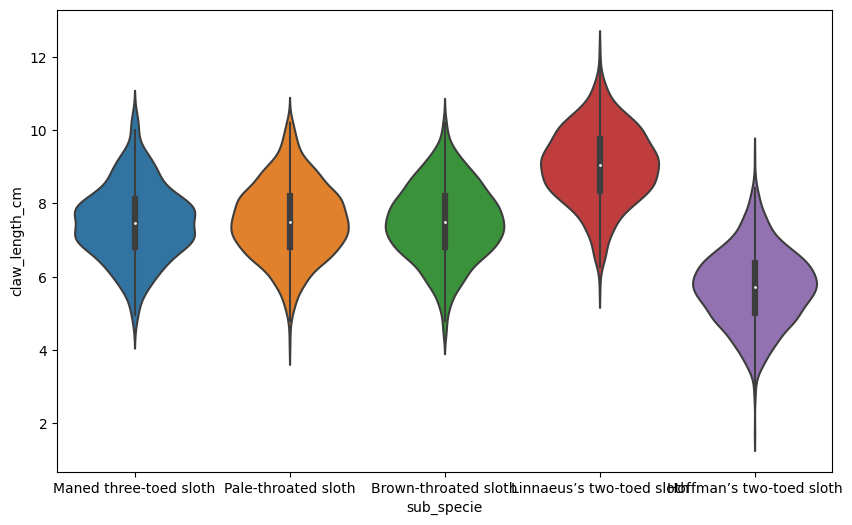

In [138]:
plt.figure(figsize = (10,6))
sns.violinplot(x='sub_specie',y='claw_length_cm',data=df);



---



<div dir=rtl> 
בגרף זה אנחנו יכולים לראות את ממוצע הגדלים של כל עצלן. גרף זה חייוני עבור המכונה, מפני שהיא נותנת הפרדה יותר ברורה עבור העצלן הרעמתי(Maned three-toed sloth) ועבור העצלן חום גרון (Brown-throated sloth), שלא הייתה לנו הפרדה ברורה ביינהם קודם לכן. בנסוף לכך הוא גם מאפשר לנו להבדיל בין העצלן של לינאוס לבין השאר, ובנוסף בין העצלן חיוור גרון לשאר.

<Axes: xlabel='size_cm', ylabel='sub_specie'>

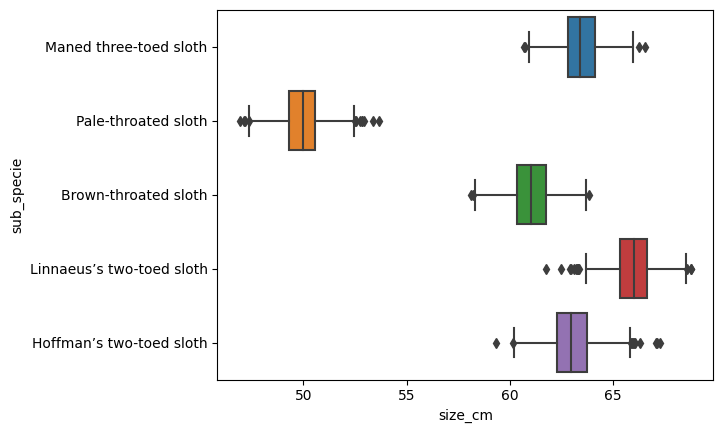

In [139]:
sns.boxplot(data=df,x='size_cm',y='sub_specie')



---



בגרף זה ניתן לראות את כל השפעות הנתונים אחת על השנייה בהבדלת סוגי העצלנים.הגרפים עם הנקודות מסמלים את השפעת נתון אחד על נתון אחר, וגרפי העמודות מסמלים את השפעת נתון על עצמו, כלומר הממוצע שלו. הגרף נותן צורה ייחודית ויצוגית ברורה מאד לדאטאסט.

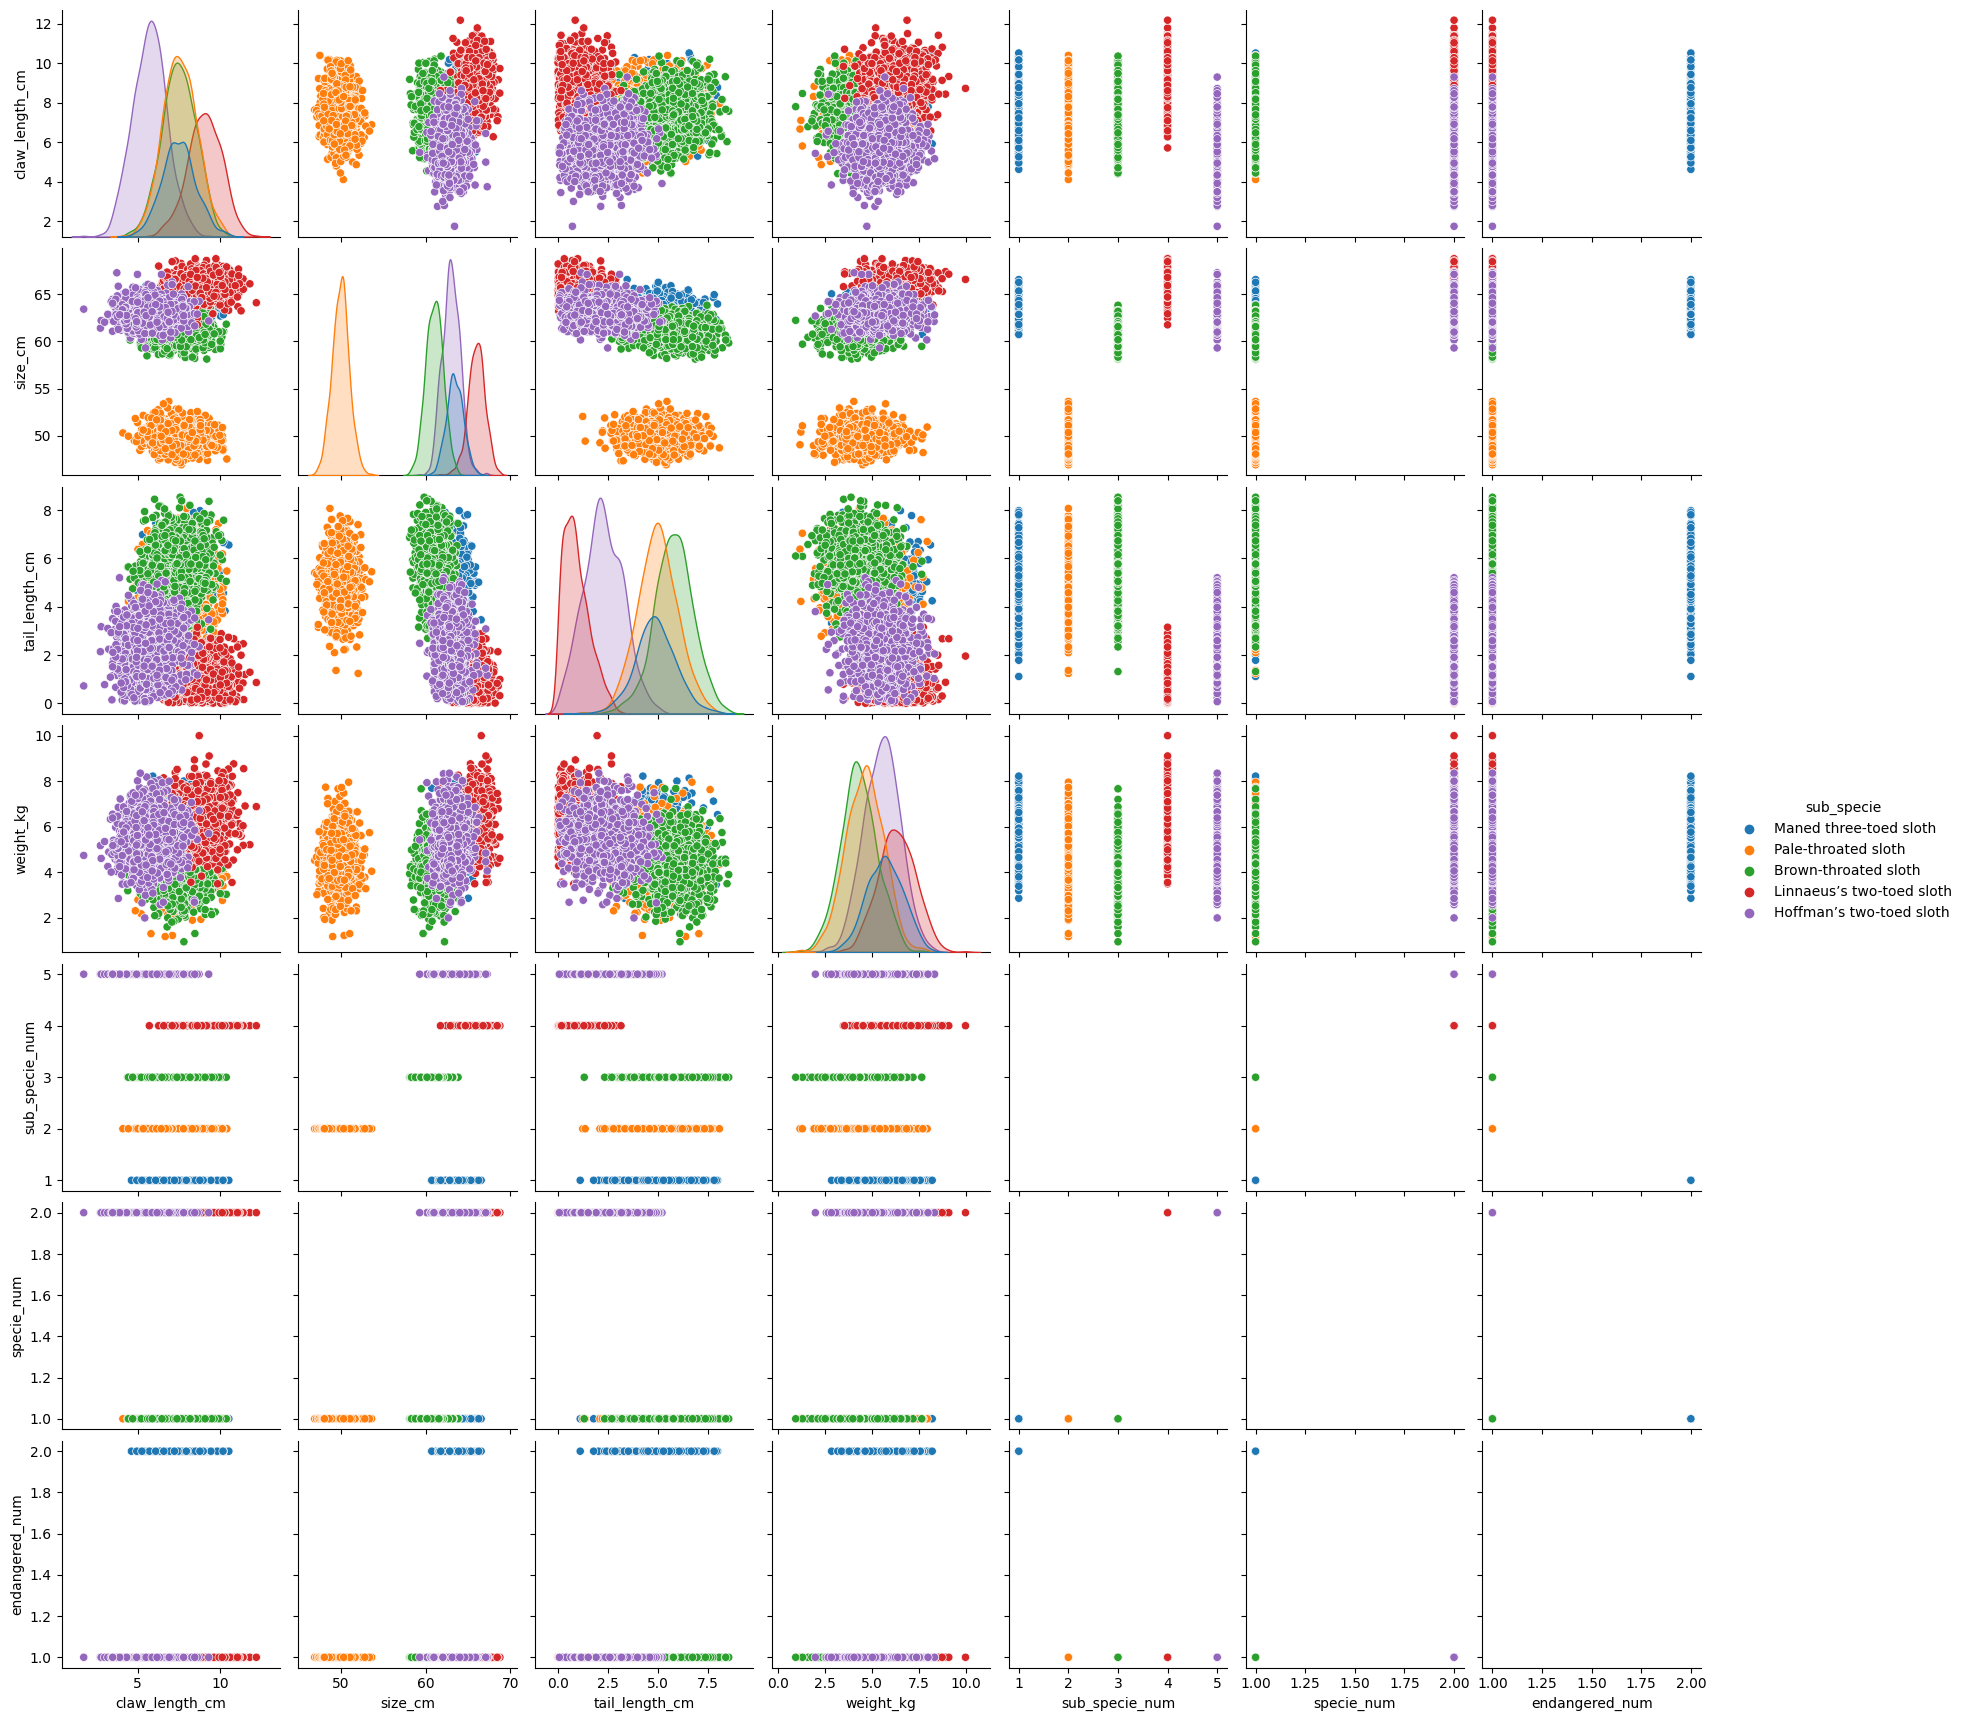

In [74]:
sns.pairplot(df, hue="sub_specie")


In [75]:
df = df.drop(columns = [ "endangered","specie","sub_specie","specie_num",'endangered_num'])


# part 3

<div dir=rtl> 

בשלב הזה התחלתי להכין את הX test וה Y test לשלב הנרמול ולמכונות הלומדות. 
בתא הראשון הורדתי את העמודה שאותה אני רוצה לסווג (sub_specie), והפכתי אותה לנאם פי אריי, כדי שכל מה שלא כולל את העמודה שאני רוצה לסווג יכלל בתוך פרמטר X. לאחר מכן שמרתי את הY בתור מה שנרצה לסווג והפכתי אותו לנאם פי.בתא הבא שמרתי את אבעת המשתנים X_test, X_train, y_test, y_train בתוך train_test_split, והגדרתי ש20% מהנתונים ילכו לtest, וכל השאר ילך ל train כלומר 80% מהנתונים. לאחר מכן הצגתי כמה שורות הלכו לtrain וכמה הלכו לtest.בשלב הבא עשיתי data scalling בעזרת שיטת נרמול הנתונים. עבור כך השתמשתי בMinMaxScaler כדי לנרמל את הנתונים בין 0 -1. לפני תחילת הנרמול ניתן לראות שהערך הגבוה ביותר בדטאסט הוא 68.752 והערך הנמוך ביותר הוא 0.003.לאחר מכן הפעלתי על הX_train fit  שלוקח את המקס transform שמחלק במקס, ועל X_test רק חילקתי במקס. לאחר הנרמול ניתן לראות כי כל הנתונים הפכו למ0-1.
השלב הבא בפרויקט הוא הפעלת המכונות הלומדות.

 המכונה הלומדת הראשונה שהשתמשתי בה היא KNN.תחילה, קבעתי את טווח הK מ1-10 בסדר קפיצות של 1.אחר כך הרצתי את הפיט על הTrain ואת הAccuracy  על הtest. את כל זה הכנסתי לתוך לולאת פור, וגיליתי שהAccuracy שלי מאד גבוה,99-100%.מכן ניתן להסיק שיש עמודות מסימות שמבדילות בצורה ברורה מידי בין סוגי העצלנים. צריך להוריד אותן בגלל שבעקבות זאת המכונה מסתמכת רק על נתונים מסויימים  וזה עלול לקלל את תהליך הלמידה(אובר פיטינג). לכן בתא מספר 27 הורדתי את כל העמודות של רמת סכנת ההכחדה ומין העצלן(דו אצבעי או תלת אצבעי),כדי לא ליצור הפרדה ישירה בין סוגי העצלנים ולאמן את המכונה להסתמך עליהם בלבד. לאחר מכן הרצתי שוב את אותה הפעולה וגליתי שרמת הדיוק עומדת על 93% - 96% .אחרי שגילית מה הK הטוב ביותר עבורי הצבתי אותו במשתנה חדש ואת הסקור שלו.בסוף אימון המכונה הדפסתי את דוח הלימוד, שהראה לי שאחוזי ההצלחה של המכונה הם כאמור93% -96% .כדי להראות זאת בצורה גרפית הרצתי מטריצת בילבול, שהראתה לי שרוב הנתונים נמצאים על האלכסון הראשי, מה שאומר שרוב סוגי העצלנים מזוהים נכון.


המכונה הלומדת הבאה שהשתמשתי בה היא SVM.הקוד הבא שעשיתי מטרתו למצוא באיזה סוג קרנל להשתמש כדי ליצור את הקלסיפיקציה הטובה ביותר: לינארי,פולינומיאל, אוRBF. כל סוג קרנל המסווג מתאמן על הX_train, ולאחר מכן הדיוק מוערך על ה X_test.   לאחר שהכנסתי את הx_train  לכל אחד מהקרנלים, הדפסתי את הסקור של שלושתם. אחרי זה לקחתי את הקרנל עם הדיוק הגבוה ביותר(במקרה הזה קרנל פולינומי)ואימנתי שוב את המכונה עליו.אחר כך הדפסתי את הקרנל הטוב ביותר ואת הדיוק שלו.לסיום הדפסתי את דוח הלימוד של המכונה השנייה, ודומה לKNN, תוצאותיה הן קצת יותר מדויקות(95 - 90% Accuracy).כמו בKNN, הצגתי את מטריצת הבילבול של המכונה וניתן לראות שוב את האלכסון הראשי הצבוע, כלומר רוב הניחושים של המכונה היו מדויקים. 

המכונה הלומדת השלישית והאחרונה שהשתמשתי בה היא פרספטרון. הפרספטרון, בדומה לSVMהיא מכונה לסיווג נתונים, אך בעוד שSVM מתמקד בסיווג לא לינארי אך גם,הפרספטרון מתמקד בסיווג לינארי. תחילה, ייצרתי את הפרספטרון שלי.הפרמטרים שנעזרתי בהם הםtol,  שקובע את התקדמות חישוב האלגוריתם, וn_iter_no_change, שקובע את מספר האפילויות בהן אין שינוי. אחרי שהצבתי מספרים כמה פעמים, גיליתי שמספר האפילויות הטוב ביותר עבורי הוא 10. לאחר מכן הצבתי בפרספטרון את הX_train וה y_train שלי. אחר כך הצגתי את תוצאות הפלט בכך שהדפסתי את הניקוד.לבסוף הצגתי את הפרספטרון במטריצת בלבול וניתן לראות קו אלכסוני ברור, אך מעט לא מדויק. לאחר מכן הדפסתי את דוח הלימוד של הפרספטרון ותוצאותיה היו מעט פחות טובות משתי המכונות הקודמות(80% - 85%).את תוצאות העבודה ניתן לראות בתיבת התוצאות האחרונה, בה ניתן לראות את תוצאת הKNN, הSVM והperceptron הסופיות.
  

In [76]:
df.head()

,claw_length_cm,size_cm,tail_length_cm,weight_kg,sub_specie_num
73,5.746,65.815,5.069,4.175,1
74,9.977,63.677,5.464,4.976,1
75,8.857,64.526,6.742,5.847,1
76,8.941,63.789,5.250,7.087,1
77,7.825,63.747,5.422,4.951,1


In [77]:
X = df.drop(['sub_specie_num'],axis=1).to_numpy()
y = df['sub_specie_num'].to_numpy()


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
print("train:", X_train.shape, y_train.shape)
print("test: " , X_test.shape, y_test.shape)

train: (3144, 4) (3144,)
test:  (1348, 4) (1348,)


In [79]:
Scaler = MinMaxScaler()
print('Before scaling:')
print('Max: ',X_train.max())
print('Min: ', X_train.min())
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
print('After scaling')
print('Max: ',X_train.max())
print('Min: ', X_train.min())


Before scaling:
Max:  68.752
Min:  0.001
After scaling
Max:  1.0
Min:  0.0


## KNN

In [80]:

for k in range(1,15,1):
    knn = KNeighborsClassifier(n_neighbors = k)  
    knn.fit(X_train,y_train)     
    score = knn.score(X_test, y_test)
    print("k = {} score test: {}".format(k,score))    

k = 1 score test: 0.9206231454005934
k = 2 score test: 0.922106824925816
k = 3 score test: 0.9376854599406528
k = 4 score test: 0.9347181008902077
k = 5 score test: 0.9495548961424333
k = 6 score test: 0.9413946587537092
k = 7 score test: 0.9488130563798219
k = 8 score test: 0.9428783382789317
k = 9 score test: 0.9451038575667656
k = 10 score test: 0.9451038575667656
k = 11 score test: 0.9465875370919882
k = 12 score test: 0.9443620178041543
k = 13 score test: 0.9473293768545994
k = 14 score test: 0.9458456973293768


In [81]:
best_k = 9
knn = KNeighborsClassifier(n_neighbors = best_k)  
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("k = {} | accuracy test: {}".format(best_k,score))  

k = 9 | accuracy test: 0.9458456973293768


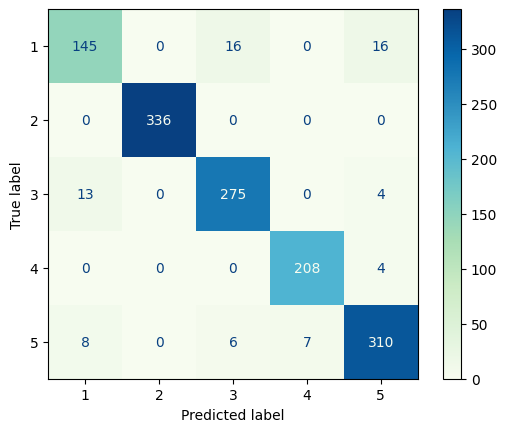

In [82]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test,values_format="d",cmap="GnBu");


In [83]:
prediction_1=knn.predict(X_test)
print(classification_report(y_test,prediction_1,digits=4))

              precision    recall  f1-score   support

           1     0.8735    0.8192    0.8455       177
           2     1.0000    1.0000    1.0000       336
           3     0.9259    0.9418    0.9338       292
           4     0.9674    0.9811    0.9742       212
           5     0.9281    0.9366    0.9323       331

    accuracy                         0.9451      1348
   macro avg     0.9390    0.9357    0.9372      1348
weighted avg     0.9446    0.9451    0.9447      1348



## SVM

In [84]:
for kernel in ['linear','poly','rbf']:
  svm2 = SVC(kernel=kernel,C=1)
  svm2.fit(X_train, y_train)
  score = svm2.score(X_test,y_test)
  print("kernel: {} score: {}".format(kernel,score))  

kernel: linear score: 0.9443620178041543
kernel: poly score: 0.9443620178041543
kernel: rbf score: 0.9465875370919882


In [85]:
best_kernel = 'poly'
svm2 = SVC(kernel=best_kernel,C=1)
svm2.fit(X_train, y_train)
score = svm2.score(X_test,y_test)
print("kernel: {} score: {}".format(best_kernel,score)) 

kernel: poly score: 0.9443620178041543


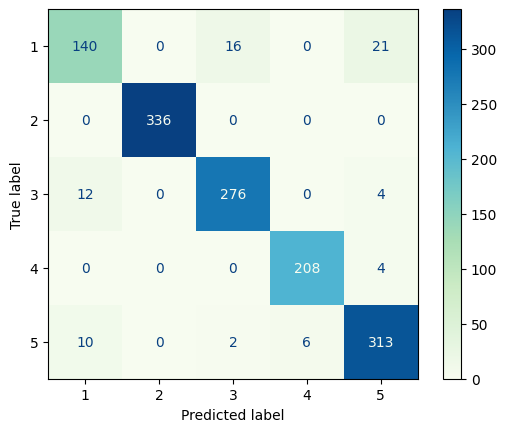

In [86]:
ConfusionMatrixDisplay.from_estimator(svm2, X_test, y_test,values_format="d",cmap="GnBu");


In [87]:
prediction_2=svm2.predict(X_test)
print(classification_report(y_test,prediction_2,digits=4))

              precision    recall  f1-score   support

           1     0.8642    0.7910    0.8260       177
           2     1.0000    1.0000    1.0000       336
           3     0.9388    0.9452    0.9420       292
           4     0.9720    0.9811    0.9765       212
           5     0.9152    0.9456    0.9302       331

    accuracy                         0.9444      1348
   macro avg     0.9380    0.9326    0.9349      1348
weighted avg     0.9437    0.9444    0.9437      1348



# perseptron

In [88]:

  clf = Perceptron(tol=1e-3, random_state=0,verbose=0,n_iter_no_change=10)  
  clf.fit(X_train, y_train)
  print(clf.score(X_train, y_train))

  y_hat = clf.predict(X_test)
  scores= metrics.accuracy_score(y_test,y_hat)

0.8524173027989822


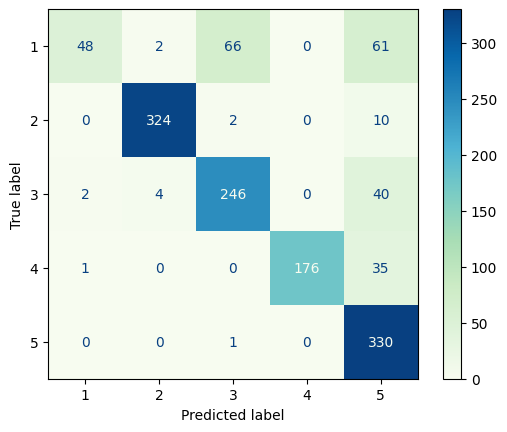

In [89]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,values_format="d",cmap="GnBu");


In [90]:
prediction_3=clf.predict(X_test)
print(classification_report(y_test,prediction_3,digits=4))

              precision    recall  f1-score   support

           1     0.9412    0.2712    0.4211       177
           2     0.9818    0.9643    0.9730       336
           3     0.7810    0.8425    0.8105       292
           4     1.0000    0.8302    0.9072       212
           5     0.6933    0.9970    0.8178       331

    accuracy                         0.8338      1348
   macro avg     0.8794    0.7810    0.7859      1348
weighted avg     0.8650    0.8338    0.8169      1348



# תוצאות

### perceptron

In [91]:
  score1= metrics.accuracy_score(y_test,y_hat)
  print("the accuracy of the perceptron is: ",score1)

the accuracy of the perceptron is:  0.8338278931750742


### SVM

In [143]:
score2 = svm2.score(X_test,y_test)
print("the best kernel: {} | the accuracy of the SVM: {}".format(best_kernel,score2)) 

the best kernel: poly | the accuracy of the SVM: 0.9443620178041543


### KNN

In [93]:
score3 = knn.score(X_test, y_test)
print("the best k = {} | the accuracy of the KNN: {}".format(best_k,score3))  

the best k = 9 the accuracy of the KNN: 0.9451038575667656


## רפלקציה אישית##

<div dir=rtl> 

 השבוע סיימתי את שלב 4 והסופי בפרויקטון הסיום במדעי הנתונים ולמדית מכונה. בפרויקט נדרשתי להתמודד עם חומרי לימוד חדשים שלא הכרתי לפני,בינהם מכונות לומדות,עבודה עם דאטאסט ושפת פייתון הזרה לי, לכן בהתחלה הרגשתי חוסר ביטחון בעבודה. אך ככל שהתקדם החומר התחלתי להבין יותר ויותר ולהתעניין בו מאד. אני מרגיש שהצלחתי להקשיב טוב מאד בשיעורים, לכן הצלחתי להינות הרבה יותר מהעבודה ולהתעמק בה באמת. במלהך העבודה בשיעורים תמיד האווירה בכיתה הייתה נעימה, והלמידה המשותפת עם החברים הייתה מאד מהנה.לסיכום, אני מעריך כי קורס זה תרם רבות ליכולת הלמידה שלי בנושא והקנה לי ידע חדש ורלוונטי לעידן המודרני בו אנחנו חיים.כעת אני מרגיש מוכן להשתמש בידע שצברתי בקורס בעבור דברים אחרים, ואני שמח שבחרתי ללמוד אותו.